In [ ]:
# ECGR 4105 HW3: Naive-Bayes
# Author: Lucas Therrien
# Student ID #801122089
# GitHub Link: https://github.com/lucastherrien/ECGR4105HW3

In [ ]:
##_________________________________________##
## Setup
##_________________________________________##

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.colors import ListedColormap
#Suppress all warnings because they annoy me
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##_________________________________________##
## Problem 1
##_________________________________________##

In [19]:
# Load Cancer Data
can = load_breast_cancer()
x = can.data
y = can.target

In [20]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [29]:
# Test/train split (80 % train, 20 % test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [23]:
# Train Naive Bayes Model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(50.722222222222214, 0.5, 'actual label')

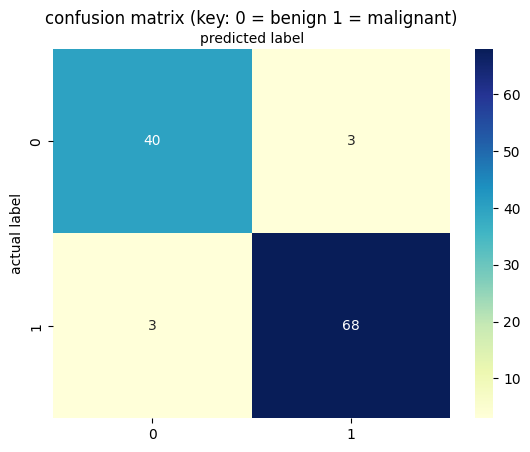

In [24]:
# Get Test Predictions
preds = naive_bayes.predict(x_test)
# Create Classification Report
print(classification_report(y_test,preds))
# Create confusion matrix
cm = confusion_matrix(y_test,preds)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position('top')
plt.title('confusion matrix (key: 0 = benign 1 = malignant)')
plt.xlabel('predicted label')
plt.ylabel('actual label')

In [ ]:
# The Naive-Bayes model (Overall F1 accuracy score: 0.95) performed marginally worse than the best logisitic regression
# model (Overall F1 accuracy score: 0.96) on this dataset 

In [ ]:
##_________________________________________##
## Problem 2
##_________________________________________##

In [44]:
# Test/train split (80 % train, 20 % test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# standardize input
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [37]:
x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.272165,-0.511361,0.207523,0.119974,0.152360,-0.500042,-0.815712,-0.281784,-0.113531,-0.886486,...,-0.019514,-0.410159,-0.064610,-0.141430,-0.492628,-0.596941,-1.007216,-0.463737,-0.807610,-1.088701
1,-0.747372,-1.060028,-0.741968,-0.715740,0.579931,-0.432478,-0.460215,-0.777668,-0.117184,0.392127,...,-0.802722,-0.588057,-0.755139,-0.727097,0.086755,-0.358044,-0.080147,-0.629418,0.053995,0.409458
2,1.531938,1.701903,1.560642,1.535930,-0.168495,1.332855,1.019312,0.761435,0.153155,-0.040996,...,1.677789,0.867467,1.673957,1.689206,0.755602,2.575331,1.597619,1.008379,1.226869,1.525456
3,1.874714,0.611545,1.812644,1.925533,-0.345884,0.174614,0.129783,0.813979,-0.705354,-1.015177,...,1.711566,0.134854,1.667835,1.629939,-0.019749,-0.123630,-0.029262,0.976940,-0.478692,-0.921573
4,0.336619,-1.380858,0.268601,0.197003,-1.184772,-0.687370,-0.711795,-0.589385,-0.329072,-1.033166,...,-0.000515,-1.585899,-0.067670,-0.095812,-0.876044,-0.532894,-0.672526,-0.511995,-0.674438,-0.904697


K = 1:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.90      0.99      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114

K = 2:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        43
           1       0.89      0.90      0.90        71

    accuracy                           0.87       114
   macro avg       0.86      0.86      0.86       114
weighted avg       0.87      0.87      0.87       114

K = 3:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        43
           1       0.89      0.90      0.90        71

    accuracy                           0.87       114
   macro avg       0.86      0.86      0.86       114
weighted avg       0.87      0.87      0.87       114

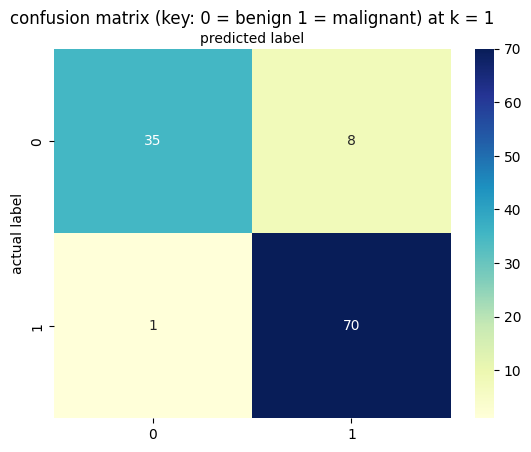

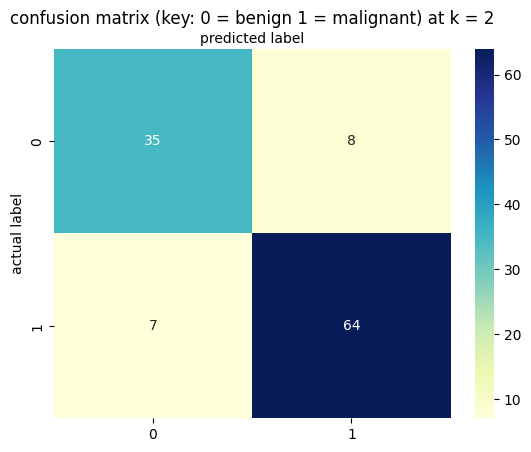

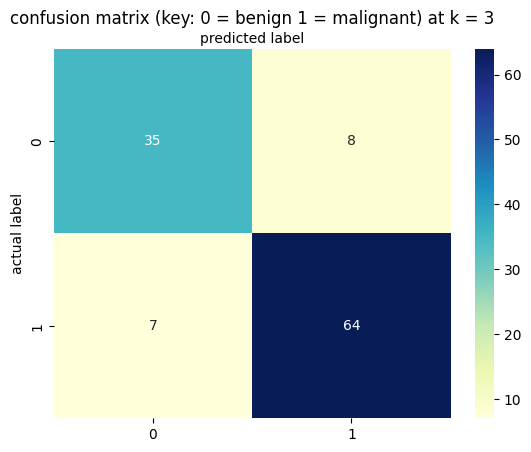

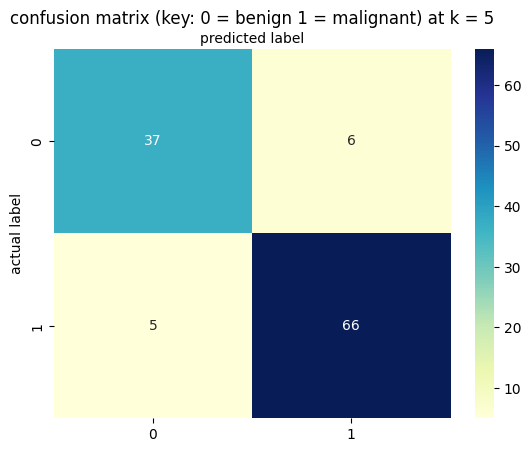

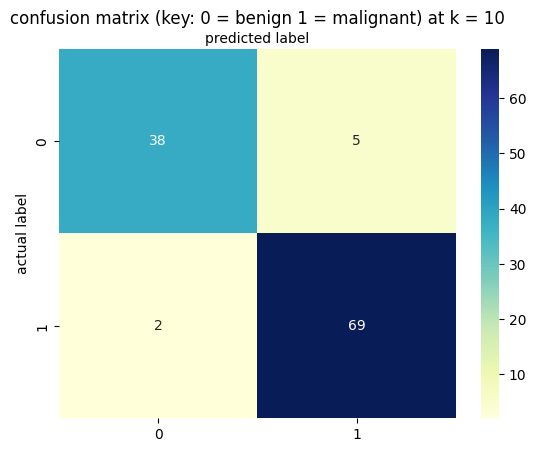

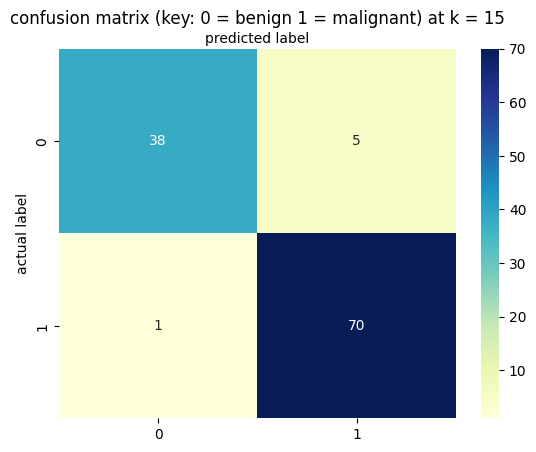

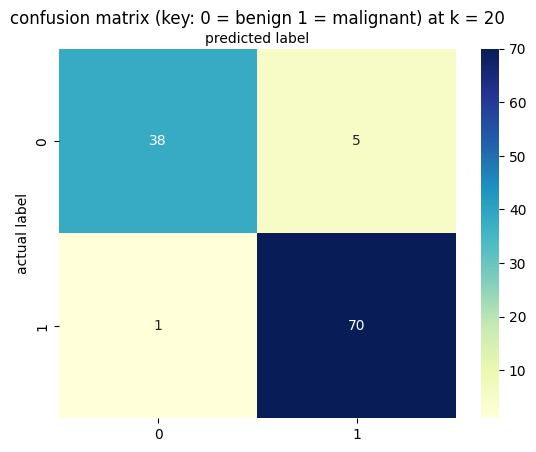

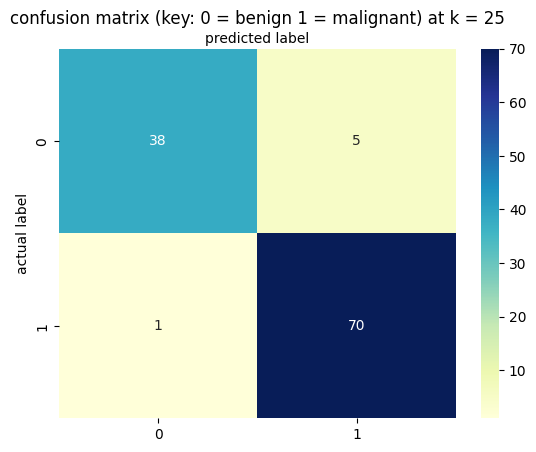

In [51]:
K = [1, 2, 3, 5, 10, 15, 20, 25]
for i in range(len(K)):
    pca = PCA(n_components=K[i], svd_solver = "auto")
    x_train_pca = pca.fit_transform(x_train)
    pca = PCA(n_components=K[i], svd_solver = "auto")
    x_test_pca = pca.fit_transform(x_test)
    clf = LogisticRegression(C=10,solver='liblinear')
    clf.fit(x_train_pca,y_train)
    preds = clf.predict(x_test_pca)
    # Create Classification Report
    print("K = "+str(K[i])+":")
    print(classification_report(y_test,preds))
    # Create confusion matrix
    cm = confusion_matrix(y_test,preds)
    fig,ax = plt.subplots()
    sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
    ax.xaxis.set_label_position('top')
    plt.title('confusion matrix (key: 0 = benign 1 = malignant) at k = ' + str(K[i]))
    plt.xlabel('predicted label')
    plt.ylabel('actual label')
    
    

In [ ]:
# Based on these results, the model acheived its highest accuracy at K = 15 features
# stagnating with a final overall F1 accuracy score of 0.95

In [ ]:
##_________________________________________##
## Problem 3
##_________________________________________##

In [52]:
# Test/train split (80 % train, 20 % test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

K = 1:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        47
           1       0.86      0.99      0.92        67

    accuracy                           0.89       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114

K = 2:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81        47
           1       0.82      0.99      0.90        67

    accuracy                           0.87       114
   macro avg       0.90      0.84      0.86       114
weighted avg       0.89      0.87      0.86       114

K = 3:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        47
           1       0.84      0.87      0.85        67

    accuracy                           0.82       114
   macro avg       0.82      0.82      0.82       114
weighted avg       0.82      0.82      0.82       114

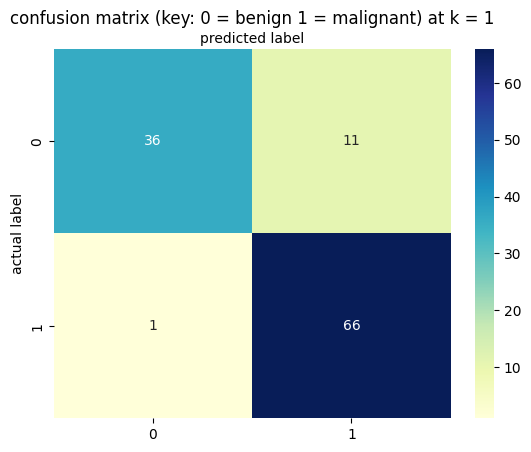

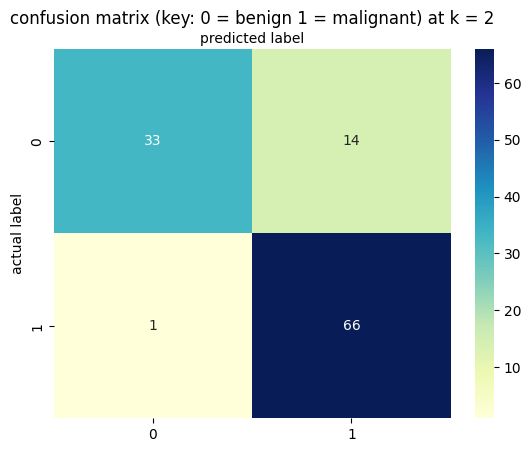

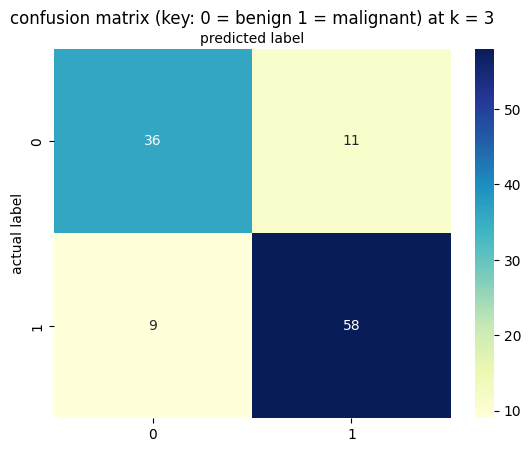

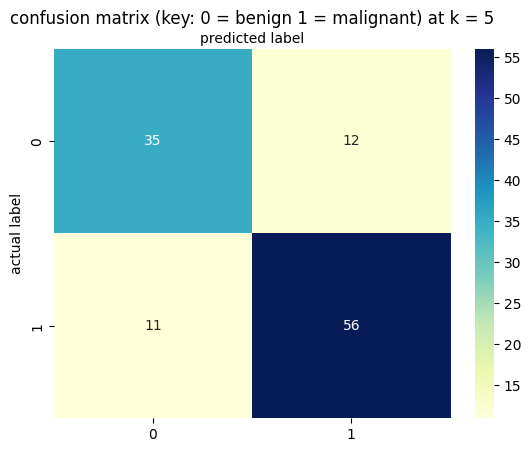

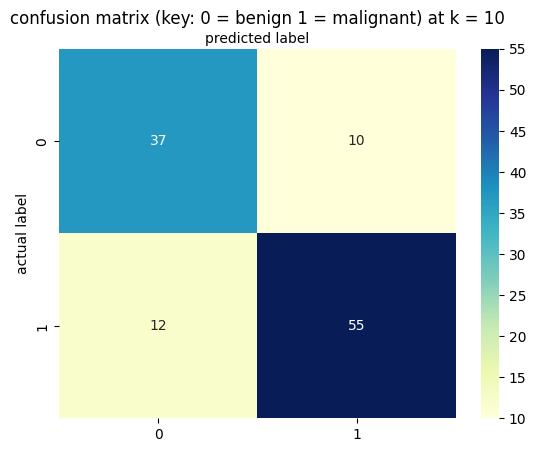

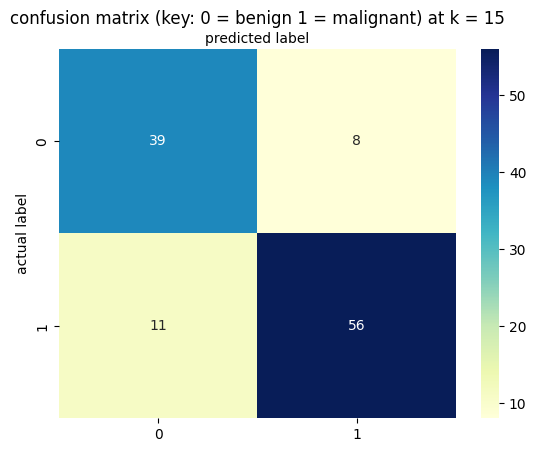

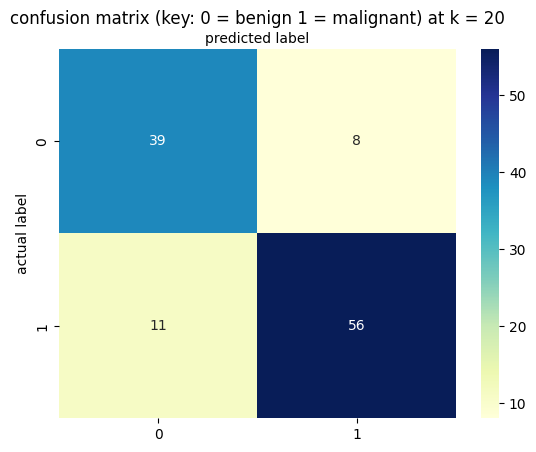

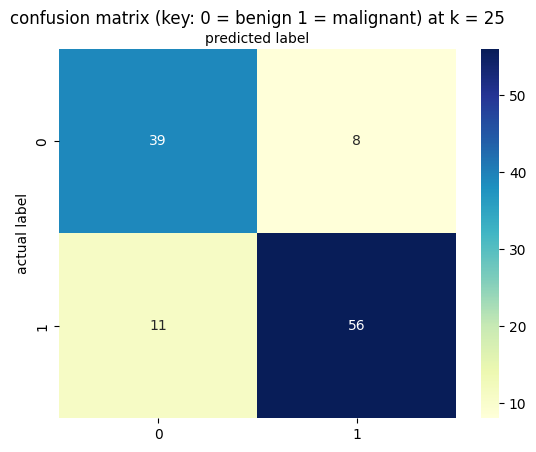

In [54]:
K = [1, 2, 3, 5, 10, 15, 20, 25]
for i in range(len(K)):
    pca = PCA(n_components=K[i], svd_solver = "auto")
    x_train_pca = pca.fit_transform(x_train)
    pca = PCA(n_components=K[i], svd_solver = "auto")
    x_test_pca = pca.fit_transform(x_test)
    naive_bayes = GaussianNB()
    naive_bayes.fit(x_train_pca,y_train)
    preds = naive_bayes.predict(x_test_pca)
    # Create Classification Report
    print("K = "+str(K[i])+":")
    print(classification_report(y_test,preds))
    # Create confusion matrix
    cm = confusion_matrix(y_test,preds)
    fig,ax = plt.subplots()
    sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
    ax.xaxis.set_label_position('top')
    plt.title('confusion matrix (key: 0 = benign 1 = malignant) at k = ' + str(K[i]))
    plt.xlabel('predicted label')
    plt.ylabel('actual label')

In [ ]:
# The Naive-Bayes Model with PCA peaked at K = 1 with an overal F1 accuracy score of 0.9.
# Compared with the logistic regression model with PCA in problem 2, this model was significantly worse